In [53]:
import os
import glob
from pathlib import Path
import numpy as np

import wispy.model_utils
import wispy.utils

import wispy.logger
import argparse

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use("agg")

from cycler import cycler
from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [54]:
from collections import OrderedDict

In [55]:
hfiles = sorted(glob.glob("0*/history*"))
print(hfiles)

histories = OrderedDict()
for hfile in hfiles:
    key = hfile.split('/')[0]
    histories[key] = wispy.model_utils.load_history(hfile)

['002/history.pickle', '003/history.pickle', '003_r/history.pickle', '004/history.pickle', '005/history.pickle', '006/history.pickle', '007/history.pickle', '008/history.pickle', '009/history.pickle', '010/history.pickle', '011/history.pickle', '012/history.pickle', '014/history.pickle']


In [56]:
tfiles = sorted(glob.glob("0*/duration*"))
print(tfiles)

durations = OrderedDict()
for tfile in tfiles:
    key = tfile.split('/')[0]
    durations[key] = wispy.model_utils.load_datetime(tfile)

['002/duration.pickle', '003/duration.pickle', '003_r/duration.pickle', '004/duration.pickle', '005/duration.pickle', '006/duration.pickle', '007/duration.pickle', '008/duration.pickle', '009/duration.pickle', '010/duration.pickle', '011/duration.pickle', '012/duration.pickle', '014/duration.pickle']


In [57]:
for k,v in durations.items():
    print(k, v)

002 3 days, 18:38:55.600452
003 0:59:51.826950
003_r 6:45:36.109633
004 0:09:39.543274
005 0:05:30.118936
006 0:54:31.744955
007 11:02:24.484101
008 20:49:35.495725
009 0:54:26.658871
010 9:29:28.909606
011 0:25:54.552525
012 0:39:14.183375
014 3:36:08.274530


In [58]:
histories.keys()

odict_keys(['002', '003', '003_r', '004', '005', '006', '007', '008', '009', '010', '011', '012', '014'])

In [59]:
# histories['001'].keys()

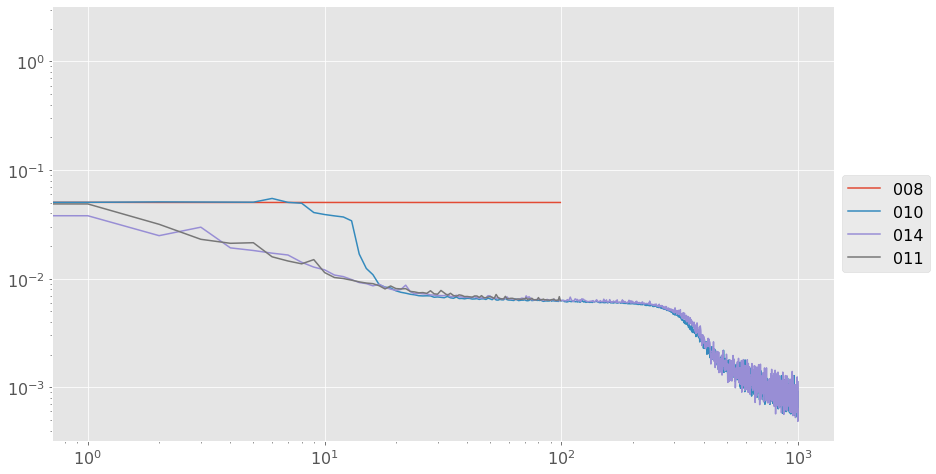

In [71]:
plt.figure(figsize=(14, 8))
plt.plot(histories['008']['mse'], label='008')
plt.plot(histories['010']['mse'], label='010')
plt.plot(histories['014']['mse'], label='014')
plt.plot(histories['011']['mse'], label='011')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-4, 1e-3)

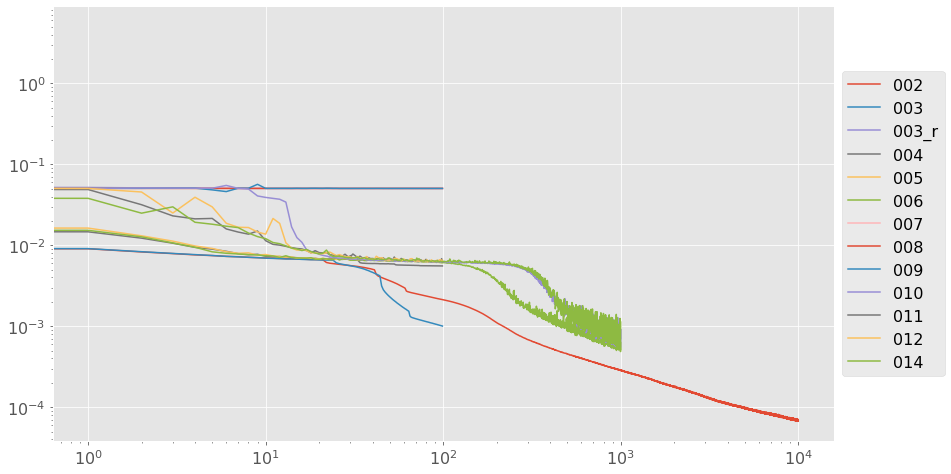

In [62]:
plt.figure(figsize=(14, 8))
for k,v in histories.items():
    plt.plot(v['mse'], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-4, 1e-3)

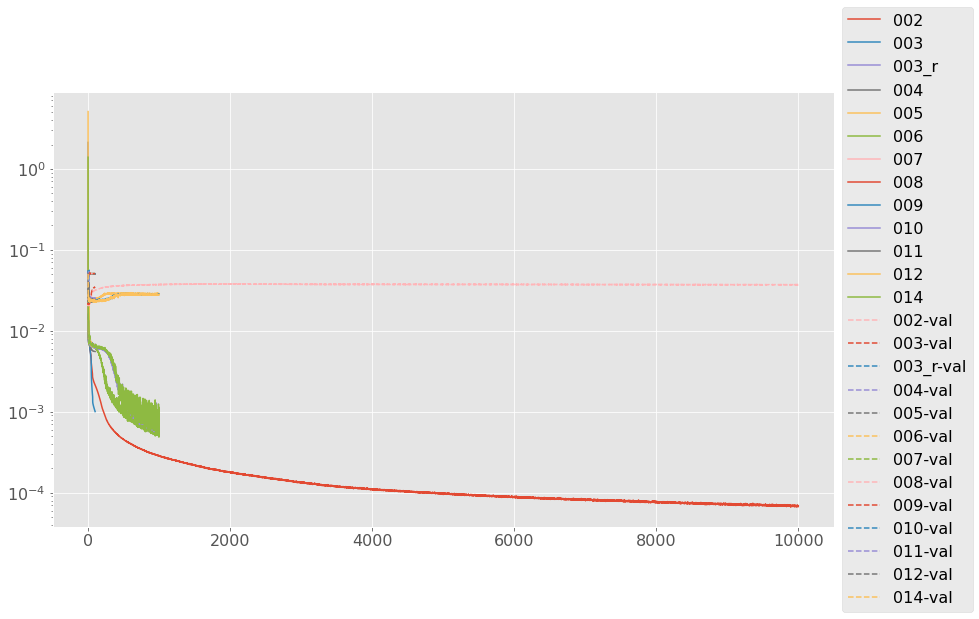

In [63]:
plt.figure(figsize=(14, 8))

for k,v in histories.items():
    plt.plot(v['mse'], '-', label=k)
for k,v in histories.items():
    plt.plot(v['val_mse'], '--', label=k+'-val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')

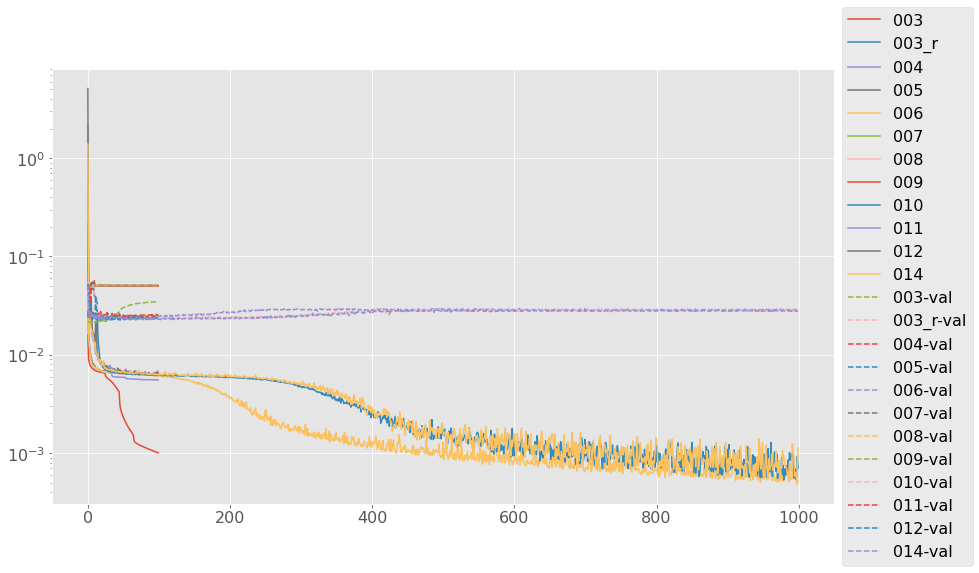

In [64]:
plt.figure(figsize=(14, 8))

for k,v in histories.items():
    if '002' not in k:
        plt.plot(v['mse'], '-', label=k)
for k,v in histories.items():
    if '002' not in k:
        plt.plot(v['val_mse'], '--', label=k+'-val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')

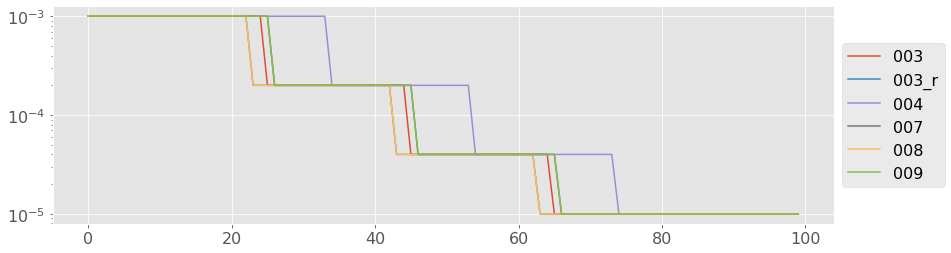

In [65]:
plt.figure(figsize=(14, 4))

for k,v in histories.items():
    if 'lr' in v.keys():
        if '002' not in k:
            plt.plot(v['lr'], '-', label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')

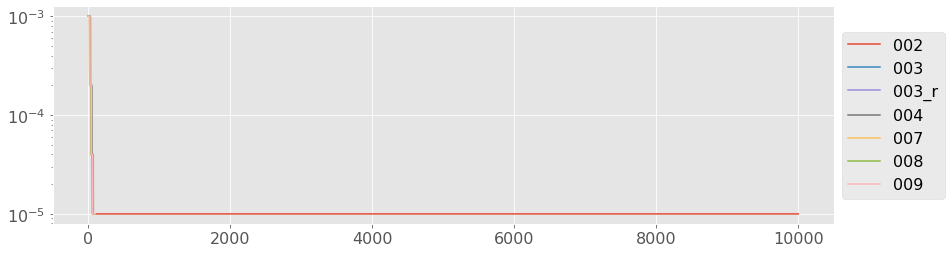

In [66]:
plt.figure(figsize=(14, 4))

for k,v in histories.items():
    if 'lr' in v.keys():
        plt.plot(v['lr'], '-', label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')